In [1]:
import os

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from os.path import join as path_join

from config import DATA_DIR

# Load data

In [2]:
data = pd.read_csv(path_join(DATA_DIR, 'eng_images.csv'))
print(data.shape)
print(data.info())
data.sample(5, random_state=134)

(8215, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 3 columns):
Unnamed: 0    8215 non-null int64
key           8215 non-null object
caption       8150 non-null object
dtypes: int64(1), object(2)
memory usage: 192.6+ KB
None


,Unnamed: 0,key,caption
5952,5952,9wx18Mk.png,The Mark\n of The\n ex xx\n The rise of The fi...
8074,8074,85ndga.jpg,None
5593,5593,5G5n2d4.png,Hillary Clinton\n On American deaths in Bengha...
3881,3881,1-zeBUERf.jpg,Rise -n- Dine at Emory Village\n June 5 at 8:2...
5165,5165,33JvFKH.jpg,Frank\n 18\n PROVENZANO\n Sheriff\n Somerset C...


In [3]:
from models import detect_text

/home/cyned/anaconda3/envs/ucu/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


loading pretrained model from /home/cyned/Documents/UCUProject/app/TPS-ResNet-BiLSTM-Attn.pth...
Loading /home/cyned/Documents/UCUProject/app/models/craft/craft_mlt_25k.pth...


# Load metric

In [4]:
%load_ext autoreload
%autoreload 2
from metric.intersection import intersection_metric, train_test_split, wer_metric as wer_metric_
from timeit_ import timeit_context

inter_metric = intersection_metric()
wer_metric = wer_metric_()

train, test = train_test_split(data)

## Textract end-to-end model

In [5]:
%load_ext autoreload
%autoreload 2

from models import get_text
from models import PostProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
with timeit_context('Total time'):
    preds = [get_text(f=path_join(DATA_DIR, 'images', sample)) for sample in tqdm(test.key, desc='Parse text')]

Parse text: 100%|██████████| 1643/1643 [21:07<00:00,  1.92it/s]

Total time:	21min 7.88sec


In [7]:
corrected_preds = PostProcessor().transform(preds)

In [ ]:
with timeit_context('Total time'):
    print(f'{inter_metric(preds)*100:.2f}%')
    print(f'{wer_metric(preds):.4f}')

# Metrics
#### End-to-end on 1644 sample
- intersection: **51.44%**
- WER metric:   **0.54**

##### On 822 samples:
##### Steps model:
- Intersection: **61.41%**
- WER metric:   **0.6360**

##### End-to-end ext metrics
- Intersection: **40.97%**
- WER metric:   **0.6618**

In [43]:
from random import randint 
from metric import intersection, text_detection_tokenizer
from models import post_processor, analyser
import pandas as pd
from os.path import join as path_join
from config import DATA_DIR
from PIL import Image

pred = pd.read_csv(path_join(DATA_DIR, 'new_pred.csv')).fillna('')

In [45]:
pred.to_csv(path_join(DATA_DIR, 'pred.csv'))

94
----- Target
Zilla
@GoodZilla

[date]

me: *don't let her know how awkward
you are*

her: nice weather
me: thanks

2018-03-16, 3:49 PM

3,119 Retweets 12.5K Likes

----- Steps model
zilla agoodzilla idatel x dont her awkward let know how me x are you her weather nice thanks me 20180016 349 pm wi 119 125k likes retweets
----- Post process


Count intersections: 100%|██████████| 1/1 [00:00<00:00, 3401.71it/s]

villa godzilla date x dont her awkward let know how me x are you her weather nice thanks me 20180016 349 pm i 119 1255 likes retreats
----- End-to-end model
Zilla @GoodZilIa  [date]  me: *donât let her know how awkward you are*  her: nice weather me: thanks  2018-03-16, 3:49 PM  3,119 Retweets 12.5K Likes  
Intersection: 0.8400000639999744
Intersection metric: 0.566666811111063
Intersection metric(post): 0.46875016601557307
{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.8378}


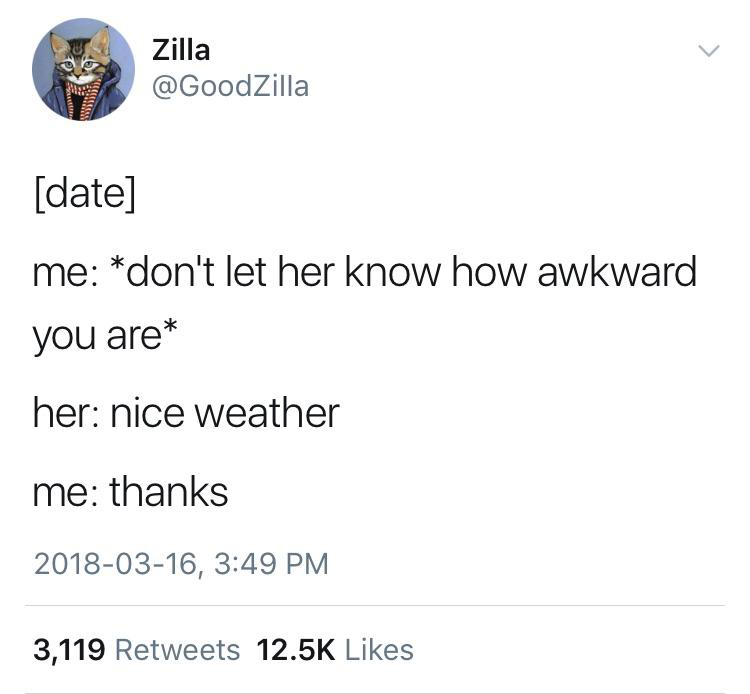

In [42]:
index = randint(0, pred.shape[0])

print(index)
print('=' * 50)
print('----- Target')
print(pred.caption.iloc[index])
print('=' * 50)
print('----- Steps model')
print(pred.text.iloc[index])
print('=' * 50)
print('----- Post process')
post = post_processor.correct(pred.text.iloc[index])
print(post)
print('=' * 50)
print('----- End-to-end model')
print(pred.end_to_end_text.iloc[index].replace('\n', ' '))
print('=' * 50)
print('Intersection: ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(pred.end_to_end_text.iloc[index])]))
print('Intersection metric: ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(pred.text.iloc[index])]))
print('Intersection metric(post): ', end='')
print(intersection(y_true=[text_detection_tokenizer(pred.caption.iloc[index])], y_pred=[text_detection_tokenizer(post)]))

print('=' * 100)
print(analyser.polarity_scores(pred.text.iloc[index]))


Image.open(path_join(DATA_DIR, 'images/', pred.key.iloc[index]))

In [11]:
pred.key.iloc[index]

'7v4ofv.jpg'